In [15]:
!pip install geopandas contextily

  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/fb/46/07a029b73f9a5c7bbf9b538e6441c42014a448f335a1cc780616f2594bad/contextily-1.6.2-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for mercantile from https://files.pythonhosted.org/packages/b2/d6/de0cc74f8d36976aeca0dd2e9cbf711882ff8e177495115fd82459afdc4d/mercantile-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/7e/1f/56462740694de764fde264051224fcbf800dad43cac92a66753153128866/rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/31/b3/802576f2ea5dcb48501bb162e4c7b7b3ca5654a42b2c968ef98a797a4c79/geographicl

In [7]:
import os
from pathlib import Path

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point


In [8]:
# --- Dossiers ---
DATA_OSM = Path("data/raw/osm")
DATA_WDPA = Path("data/raw/wdpa")

# --- Chargements dynamiques ---
roads = gpd.read_file(DATA_OSM / "gis_osm_roads_free_1.shp")
rail = gpd.read_file(DATA_OSM / "gis_osm_railways_free_1.shp")
water = gpd.read_file(DATA_OSM / "gis_osm_waterways_free_1.shp")
water_area = gpd.read_file(DATA_OSM / "gis_osm_water_a_free_1.shp")

pois = gpd.read_file(DATA_OSM / "gis_osm_pois_free_1.shp")
places = gpd.read_file(DATA_OSM / "gis_osm_places_free_1.shp")


In [10]:
DATA = Path("data/raw")

# --- Charger les points ---
gdf_points = gpd.GeoDataFrame(pd.concat([
    gpd.read_file(DATA / "WDPA_WDOECM_Nov2025_Public_BEN_shp_0/WDPA_WDOECM_Nov2025_Public_BEN_shp-points.shp"),
    gpd.read_file(DATA / "WDPA_WDOECM_Nov2025_Public_BEN_shp_1/WDPA_WDOECM_Nov2025_Public_BEN_shp-points.shp"),
    gpd.read_file(DATA / "WDPA_WDOECM_Nov2025_Public_BEN_shp_2/WDPA_WDOECM_Nov2025_Public_BEN_shp-points.shp")
], ignore_index=True))

# --- Charger les polygones ---
gdf_polygons = gpd.GeoDataFrame(pd.concat([
    gpd.read_file(DATA / "WDPA_WDOECM_Nov2025_Public_BEN_shp_0/WDPA_WDOECM_Nov2025_Public_BEN_shp-polygons.shp"),
    gpd.read_file(DATA / "WDPA_WDOECM_Nov2025_Public_BEN_shp_1/WDPA_WDOECM_Nov2025_Public_BEN_shp-polygons.shp"),
    gpd.read_file(DATA / "WDPA_WDOECM_Nov2025_Public_BEN_shp_2/WDPA_WDOECM_Nov2025_Public_BEN_shp-polygons.shp")
], ignore_index=True))


In [12]:
# Vérification 

print("Points :", gdf_points.shape)
print("Polygons :", gdf_polygons.shape)

print("\nColonnes points :", gdf_points.columns)
print("\nColonnes polygons :", gdf_polygons.columns)

gdf_points.head()
gdf_polygons.head()


Points : (46, 29)
Polygons : (30, 31)

Colonnes points : Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'REP_AREA', 'NO_TAKE', 'NO_TK_AREA', 'STATUS',
       'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE', 'MANG_AUTH', 'MANG_PLAN', 'VERIF',
       'METADATAID', 'SUB_LOC', 'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ',
       'geometry'],
      dtype='object')

Colonnes polygons : Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'geometry'],
      dtype='object')


,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,597.0,597,1,Boucle de la Pendjari,Boucle de la Pendjari,National Park,National Park,National,II,Not Applicable,...,Not Reported,Not Reported,State Verified,6,BJ-AK,BEN,BEN,Not Applicable,Not Applicable,"POLYGON ((1.69199 11.40924, 1.70254 11.40491, ..."
1,2252.0,2252,1,Djona,Djona,Hunting Zone,Hunting Zone,National,VI,Not Applicable,...,Not Reported,Not Reported,State Verified,6,BJ-AL,BEN,BEN,Not Applicable,Not Applicable,"POLYGON ((3.17124 11.63687, 3.16978 11.63161, ..."
2,2253.0,2253,1,Pendjari,Pendjari,Hunting Zone,Hunting Zone,National,VI,Not Applicable,...,Not Reported,Not Reported,State Verified,6,BJ-AK,BEN,BEN,Not Applicable,Not Applicable,"POLYGON ((1.15008 11.16, 1.15236 11.1559, 1.15..."
3,2254.0,2254,1,Atakora,Atakora,Hunting Zone,Hunting Zone,National,VI,Not Applicable,...,Not Reported,Not Reported,State Verified,6,BJ-AK,BEN,BEN,Not Applicable,Not Applicable,"POLYGON ((2.18558 11.38934, 2.18346 11.38644, ..."
4,5157.0,5157,1,Kétou,Kétou,Classified Forest,Classified Forest,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,State Verified,6,BJ-PL,BEN,BEN,Not Applicable,Not Applicable,"POLYGON ((2.46716 7.39515, 2.46135 7.39347, 2...."


In [13]:
# Passer à la création de 2 fichiers unifiés

OUTPUT = Path("data/processed")
OUTPUT.mkdir(parents=True, exist_ok=True)

gdf_points.to_file(OUTPUT / "wdpa_benin_points.shp")
gdf_polygons.to_file(OUTPUT / "wdpa_benin_polygons.shp")


C:\Users\HP\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555681859 of field WDPAID of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\HP\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555681858 of field WDPAID of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\HP\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555681857 of field WDPAID of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\HP\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555721459 of field WDPAID of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\HP\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555715009 of field WDPAID of f

In [16]:

import contextily as ctx
from shapely.ops import nearest_points
import warnings
warnings.filterwarnings("ignore")

# dossiers
DATA = Path("data/processed")
OUT = Path("outputs")
OUT_maps = OUT / "maps"
OUT_figs = OUT / "figures"
OUT_tables = OUT / "tables"
for d in (OUT, OUT_maps, OUT_figs, OUT_tables):
    d.mkdir(parents=True, exist_ok=True)

plt.rcParams.update({"figure.dpi":150, "font.size":10})


In [17]:
# charger shapefiles
wdpa_pts = gpd.read_file(DATA / "wdpa_benin_points.shp")
wdpa_polys = gpd.read_file(DATA / "wdpa_benin_polygons.shp")

# GADM 
gadm_dir = DATA / "gadm41_BEN_shp"
adm0 = gpd.read_file(gadm_dir / "gadm41_BEN_0.shp")
adm1 = gpd.read_file(gadm_dir / "gadm41_BEN_1.shp")  # départements
adm2 = gpd.read_file(gadm_dir / "gadm41_BEN_2.shp")  # communes 
adm3 = gpd.read_file(gadm_dir / "gadm41_BEN_3.shp")  # arrondissements

# OSM layers 
osm_dir = DATA / "osm"
roads = gpd.read_file(osm_dir / "gis_osm_roads_free_1.shp")
pois = gpd.read_file(osm_dir / "gis_osm_pois_free_1.shp")
places = gpd.read_file(osm_dir / "gis_osm_places_free_1.shp")

# quick checks
print("WDPA points:", len(wdpa_pts), "polygons:", len(wdpa_polys))
print("Regions (adm1):", len(adm1), "Roads:", len(roads), "POIs:", len(pois))


WDPA points: 46 polygons: 30
Regions (adm1): 12 Roads: 134502 POIs: 10151


In [18]:
# harmoniser CRS en EPSG:4326 pour les cartes web, filtrer établissements santé
for g in (wdpa_pts, wdpa_polys, adm0, adm1, adm2, adm3, roads, pois, places):
    if g.crs is None:
        raise ValueError("Une couche n'a pas de CRS - corrige avant de continuer.")
    g.to_crs(epsg=4326, inplace=True)

# Filtrer POIs santé 
# Priorité: 'fclass' (Geofabrik), fallback 'amenity'
if 'fclass' in pois.columns:
    health = pois[pois['fclass'].isin(['hospital','clinic','pharmacy','doctors'])]
elif 'amenity' in pois.columns:
    health = pois[pois['amenity'].isin(['hospital','clinic','pharmacy','doctors'])]
else:
    # heuristique: chercher dans la ligne
    kw = ['hospital','clinic','pharmacy','doctor','sante','hôpital','clinique','pharmacie']
    health = pois[pois.apply(lambda r: any(k in str(r.values).lower() for k in kw), axis=1)]

print("Etablissements santé détectés:", len(health))


Etablissements santé détectés: 652


In [38]:
# Vérifier le CRS actuel
print(gdf_polygons.crs)

# Reprojection en UTM pour calculs métriques
gdf_polygons = gdf_polygons.to_crs(epsg=32631)

# Calcul de la surface en m²
gdf_polygons['surface_m2'] = gdf_polygons.area

# Optionnel : convertir en km²
gdf_polygons['surface_km2'] = gdf_polygons['surface_m2'] / 1e6


EPSG:32631


FileNotFoundError: [Errno 2] No such file or directory: 'outouts/maps/carte_benin_globale.png'

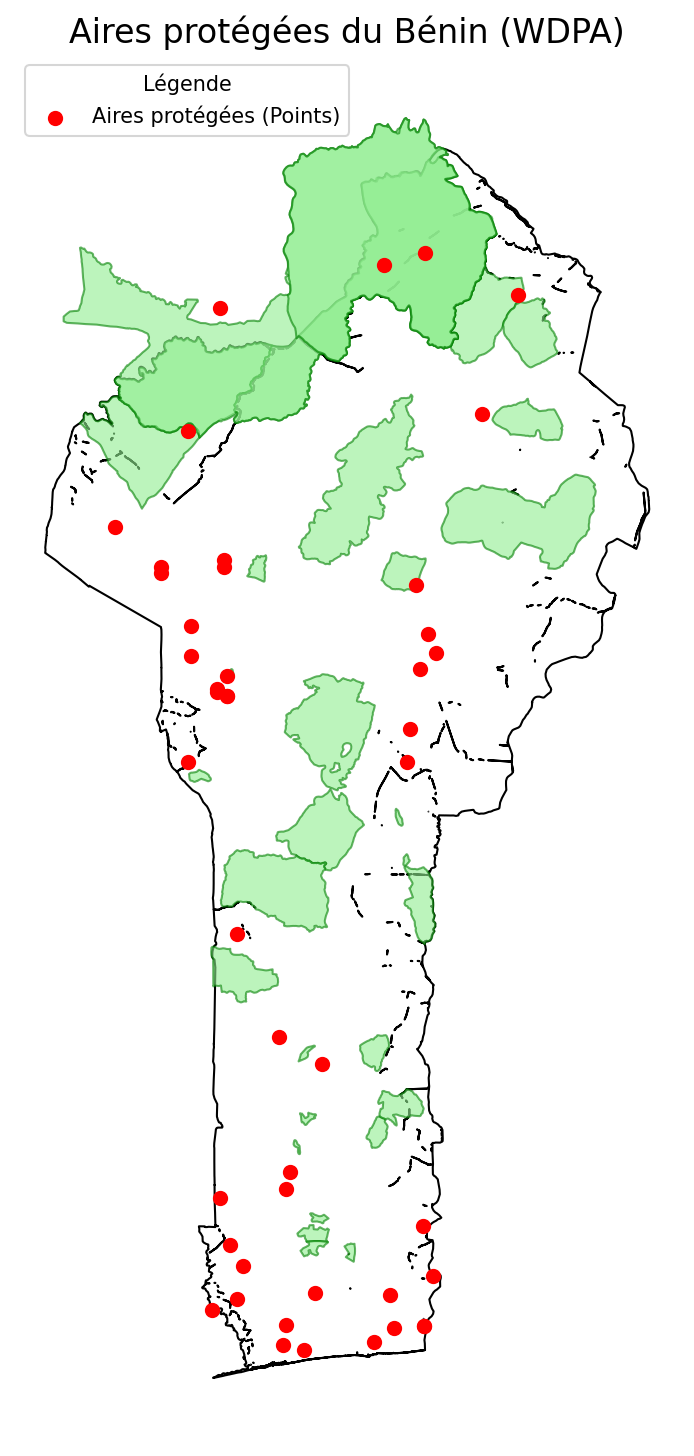

In [44]:

gdf_points = gpd.read_file(DATA / "wdpa_benin_points.shp")
gdf_polygons = gpd.read_file(DATA / "wdpa_benin_polygons.shp")

fig, ax = plt.subplots(figsize=(10, 12))

adm0.plot(ax=ax, color="white", edgecolor="black")

gdf_polygons.plot(ax=ax, color="lightgreen", edgecolor="green", alpha=0.6, label="Aires protégées (Polygones)")
gdf_points.plot(ax=ax, color="red", markersize=40, label="Aires protégées (Points)")

ax.set_title("Aires protégées du Bénin (WDPA)", fontsize=16)
ax.legend(loc="upper left", title="Légende")

plt.axis("off")
plt.savefig("outouts/maps/carte_benin_globale.png", dpi=300, bbox_inches="tight")
plt.show()



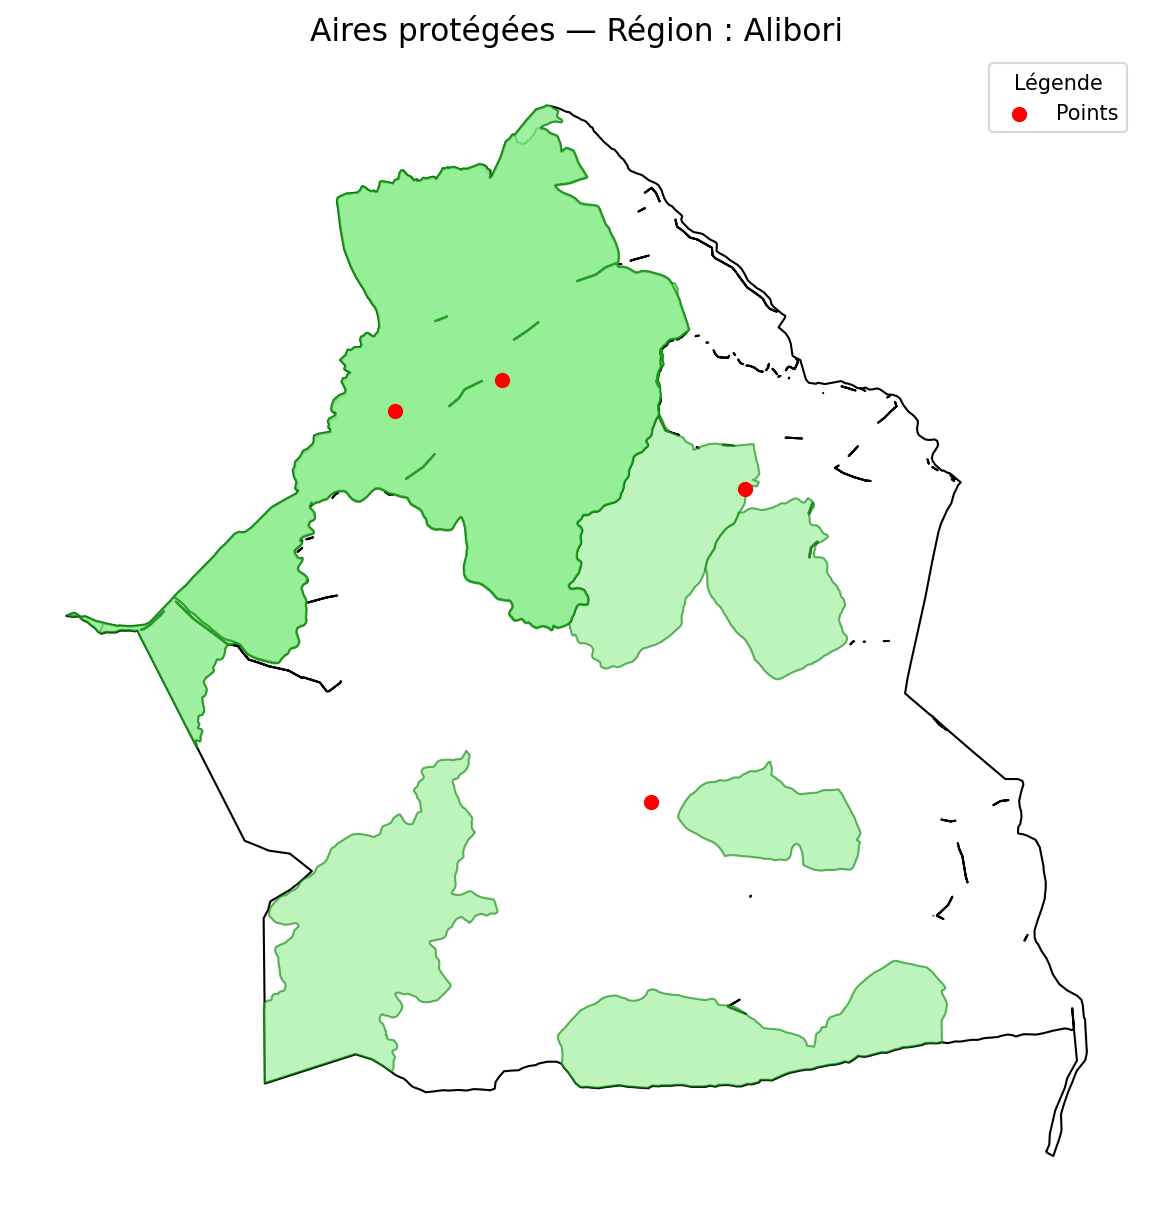

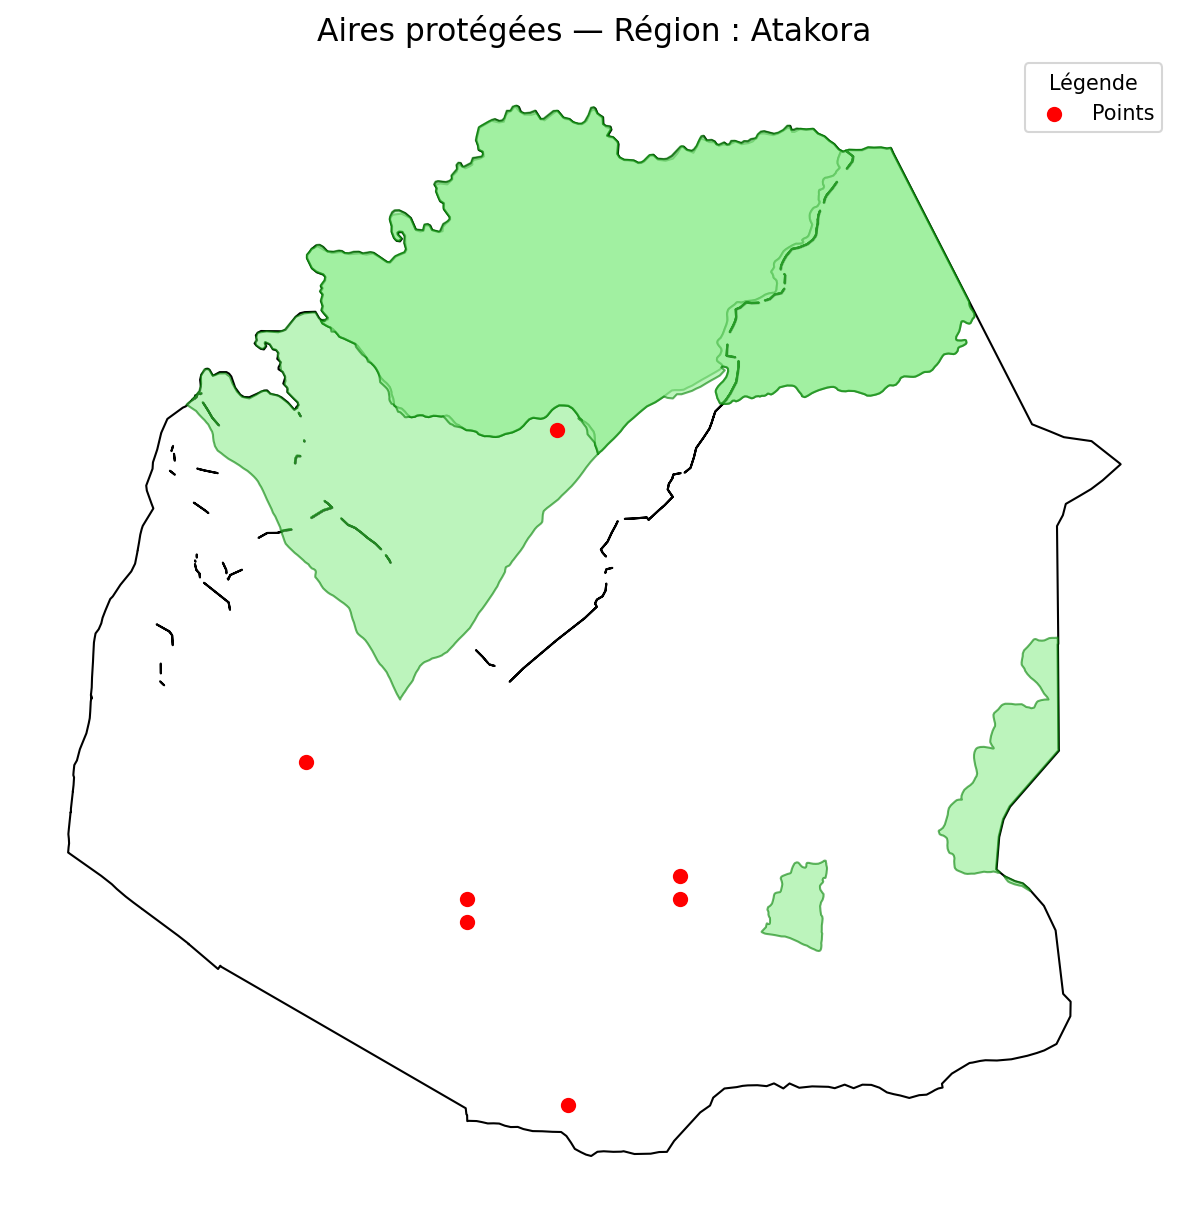

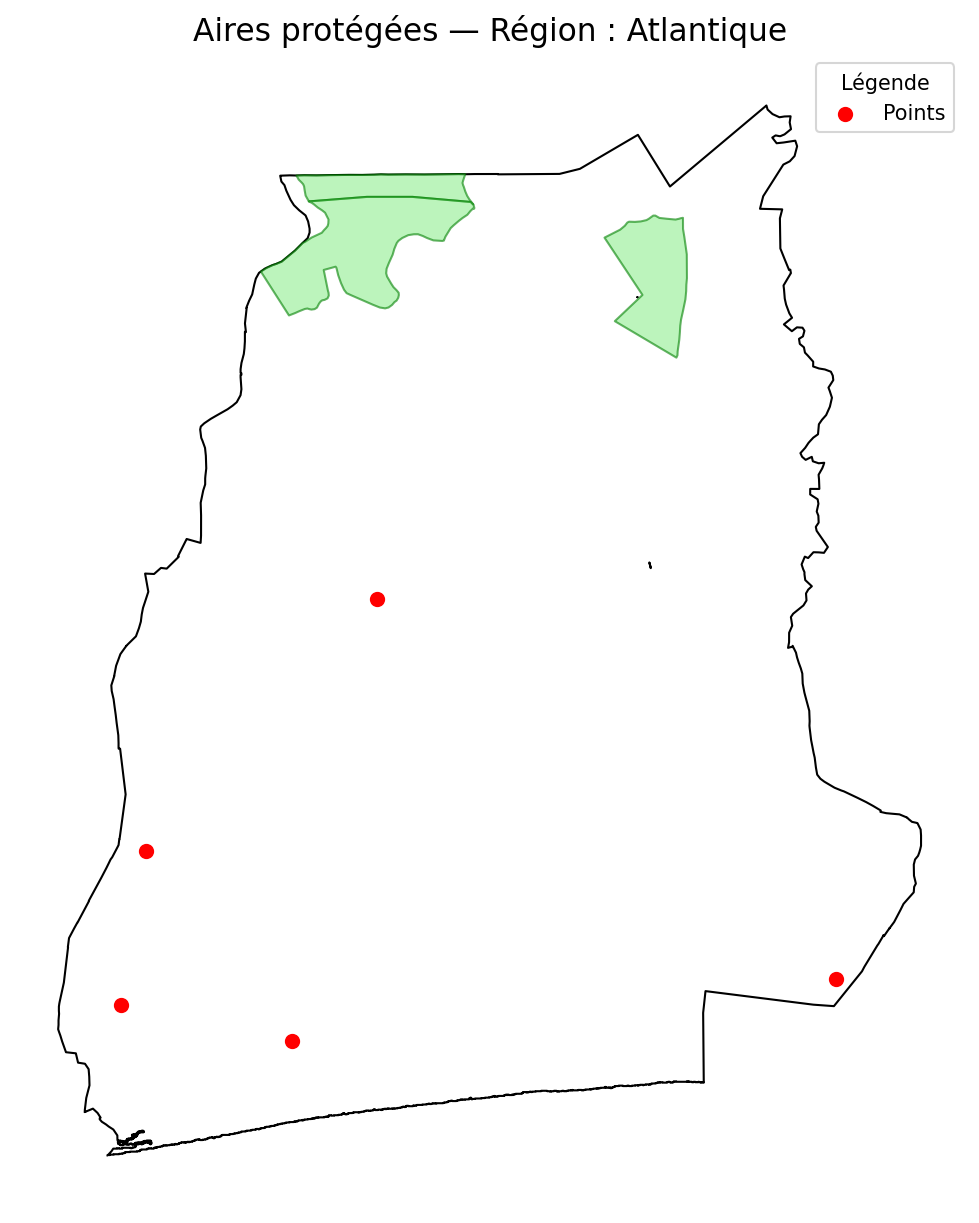

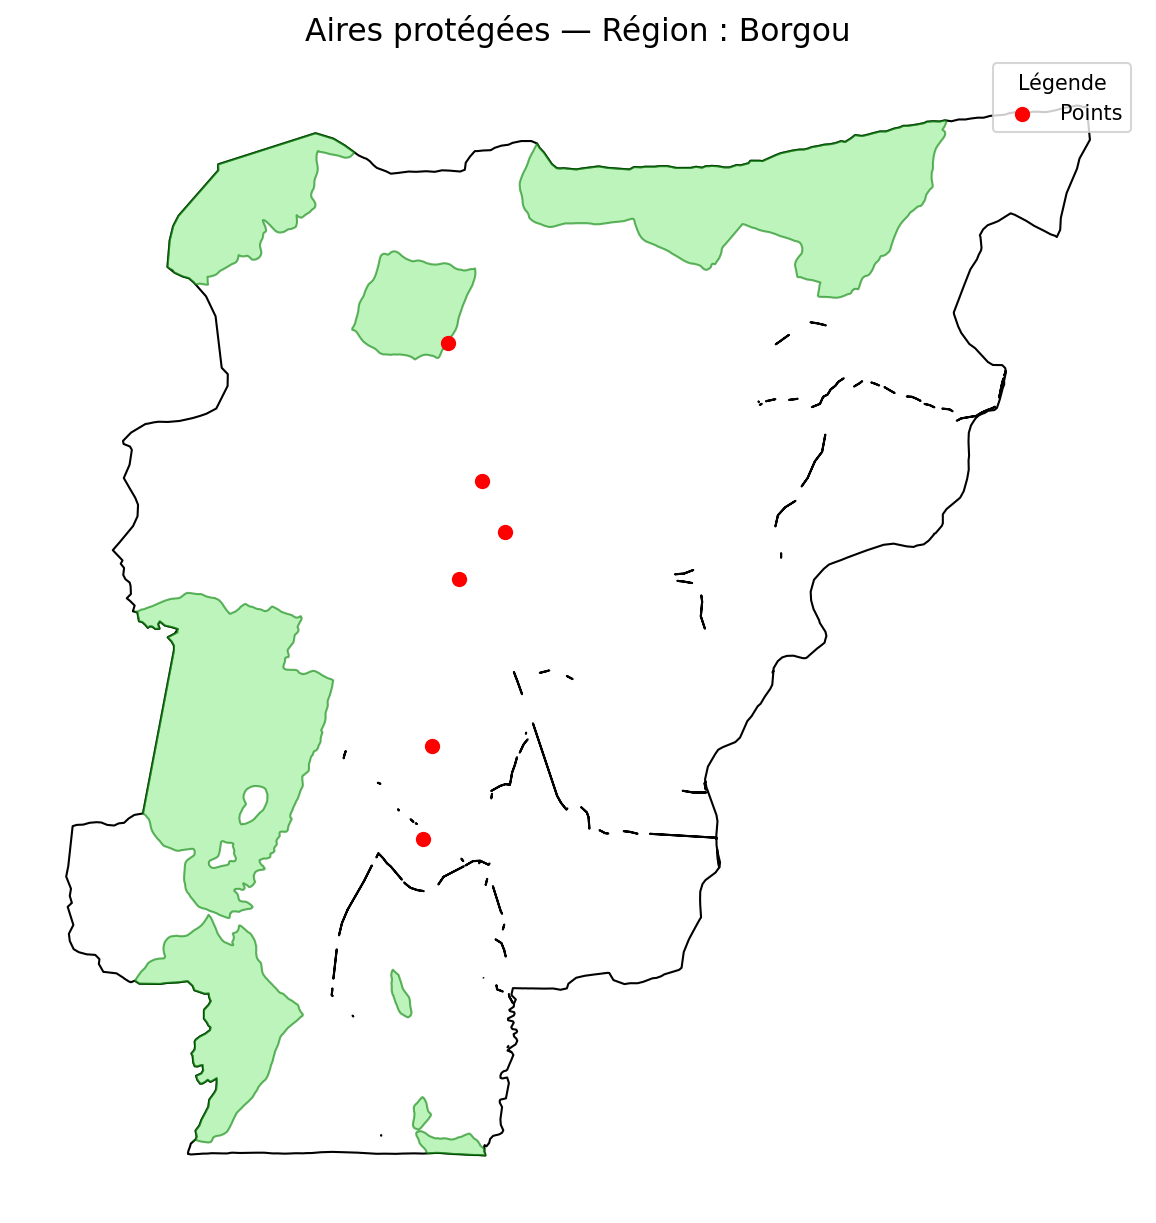

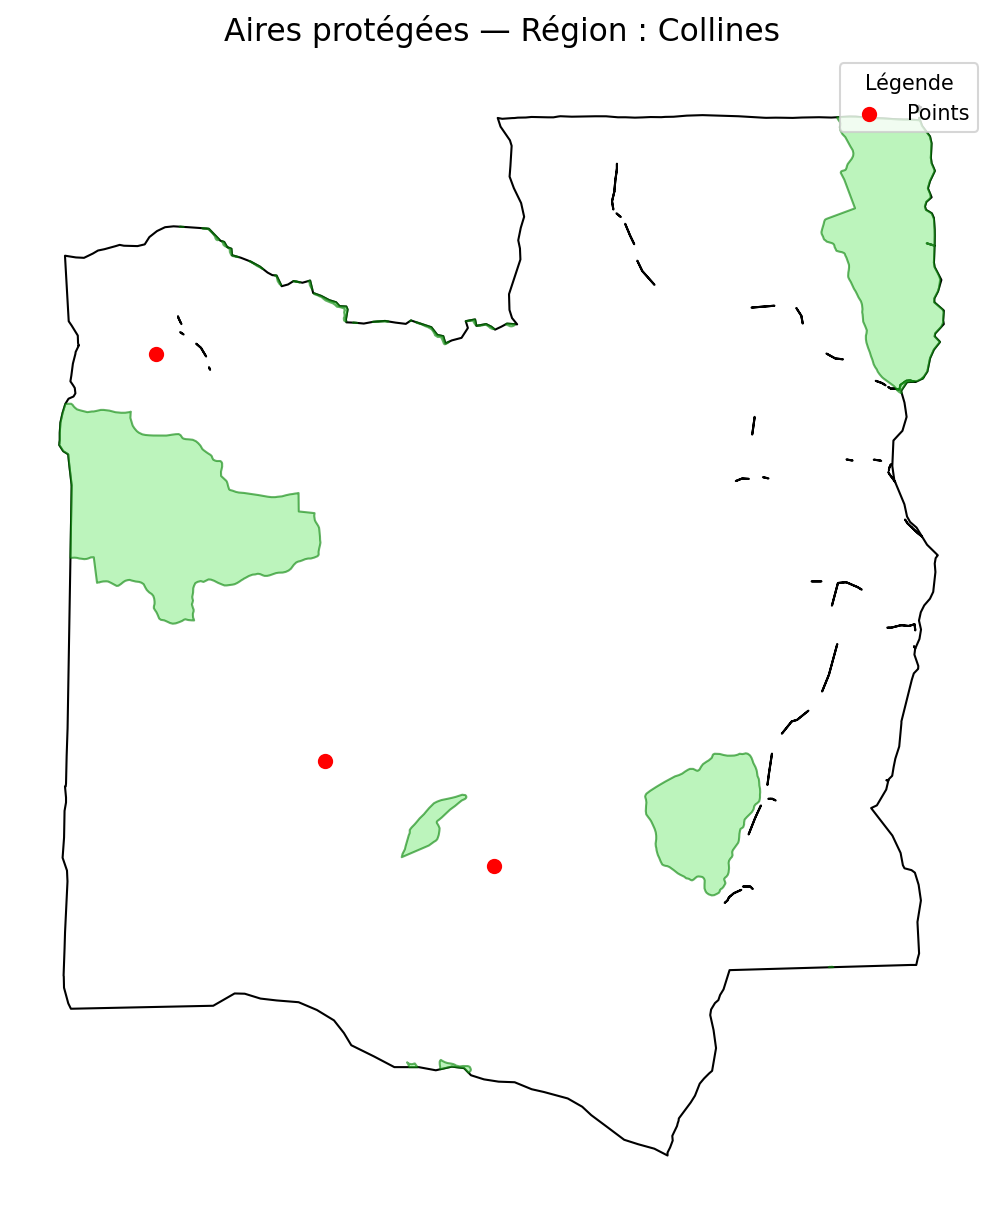

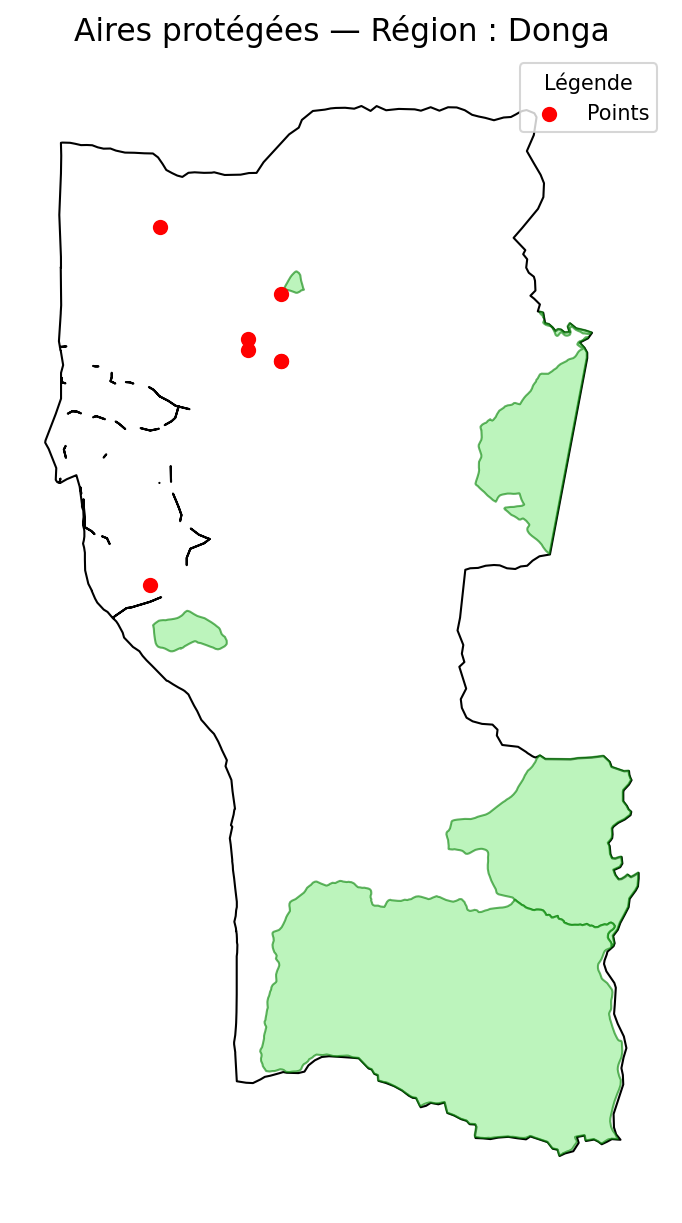

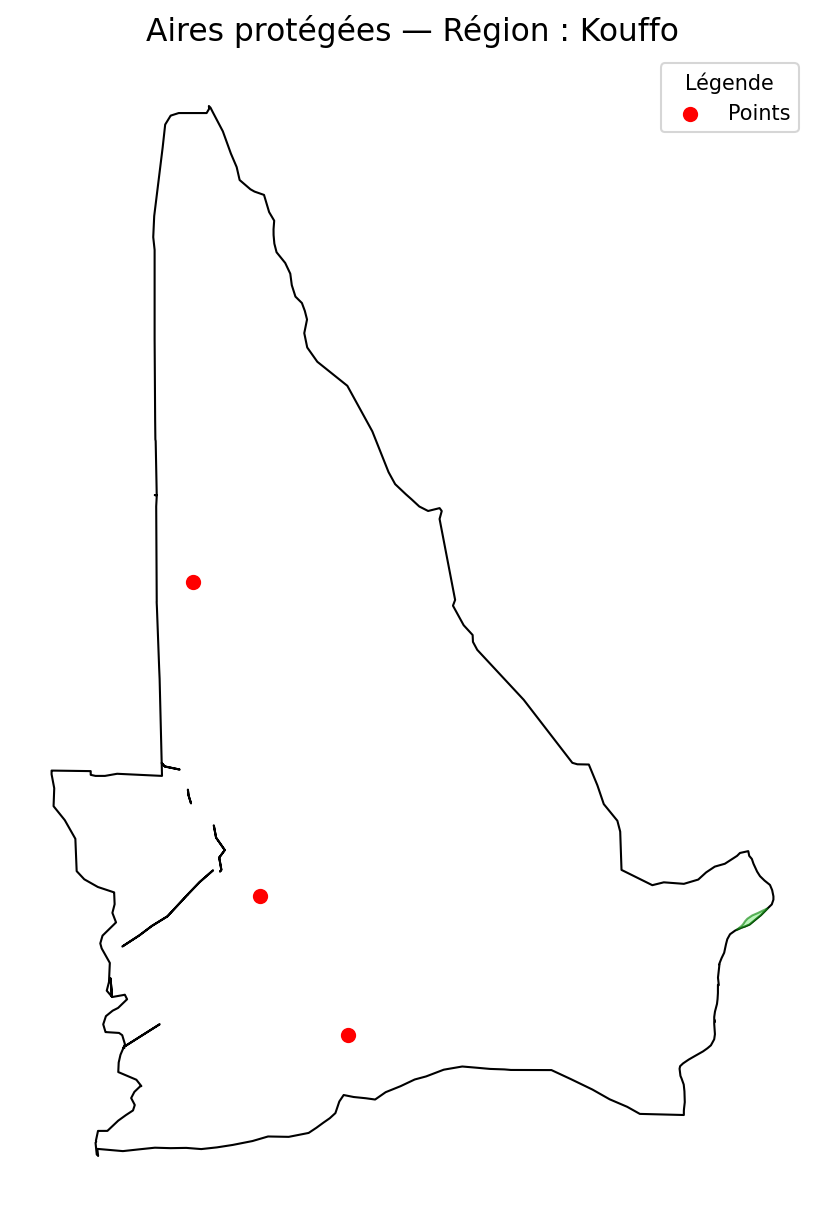

ValueError: aspect must be finite and positive 

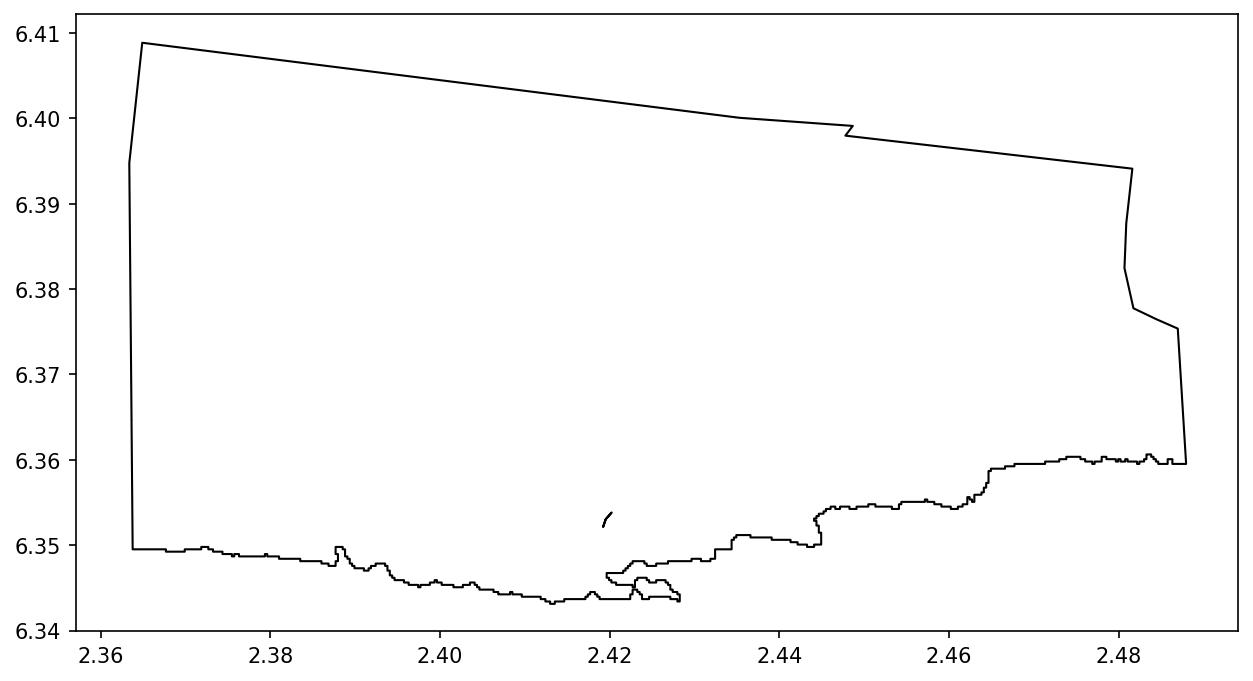

In [49]:
# Cartes par région 


regions = adm1["NAME_1"].unique()

for reg in regions:
    fig, ax = plt.subplots(figsize=(10, 10))

    region_shape = adm1[adm1["NAME_1"] == reg]

    # 1. Fond régional
    region_shape.plot(ax=ax, color="white", edgecolor="black")

    # 2. Clip points / polygones à la région
    pts_reg = gpd.overlay(gdf_points, region_shape, how="intersection")
    poly_reg = gpd.overlay(gdf_polygons, region_shape, how="intersection")

    # 3. Dessin
    poly_reg.plot(ax=ax, color="lightgreen", edgecolor="green", alpha=0.6, label="Polygones")
    pts_reg.plot(ax=ax, color="red", markersize=40, label="Points")

    ax.set_title(f"Aires protégées — Région : {reg}", fontsize=15)
    ax.legend(title="Légende")
    plt.axis("off")

    plt.savefig(f"outputs/maps/carte_region_{reg}.png", dpi=300, bbox_inches="tight")
    plt.show()


In [29]:
gdf_polygons.crs, gdf_points.crs, adm0.crs


(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [30]:
gdf_polygons.geometry.is_empty.sum()


0

In [32]:

print(gdf_polygons.geom_type.value_counts())



Polygon         28
MultiPolygon     2
Name: count, dtype: int64


In [34]:
from shapely.validation import make_valid
gdf_polygons['geometry'] = gdf_polygons['geometry'].apply(make_valid)



In [33]:
# Vérifier le CRS actuel
print(gdf_polygons.crs)

# Reprojection en UTM pour calculs métriques
gdf_polygons = gdf_polygons.to_crs(epsg=32631)

# Calcul de la surface en m²
gdf_polygons['surface_m2'] = gdf_polygons.area

# Optionnel : convertir en km²
gdf_polygons['surface_km2'] = gdf_polygons['surface_m2'] / 1e6


EPSG:4326


In [21]:

# déterminer colonne
col = 'fclass' if 'fclass' in health.columns else ('amenity' if 'amenity' in health.columns else None)

if col:
    counts = health[col].value_counts().rename_axis('type').reset_index(name='count')
else:
    counts = pd.DataFrame({'type':['unknown'],'count':[len(health)]})

counts.to_csv(OUT_tables / "counts_health_types.csv", index=False)

# plot top
top = counts.head(20)
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(top['type'][::-1], top['count'][::-1], color="#4c72b0")
ax.set_xlabel("Nombre")
ax.set_title("Nombre d'établissements par type (OSM)")
plt.tight_layout()
plt.savefig(OUT_figs / "nombre_etablissements_par_type.png")
plt.close()
print("Nombre par type sauvegardé:", OUT_figs / "nombre_etablissements_par_type.png")


Nombre par type sauvegardé: outputs\figures\nombre_etablissements_par_type.png


In [22]:
# heuristique UTM zone
centroid = adm0.geometry.centroid.iloc[0]
utm_zone = int((centroid.x + 180) / 6) + 1
epsg_utm = 32600 + utm_zone
print("EPSG UTM choisi:", epsg_utm)

health_m = health.to_crs(epsg=epsg_utm)
roads_m = roads.to_crs(epsg=epsg_utm)

# union des routes (performance ok pour dataset modeste)
roads_union = roads_m.geometry.unary_union

def dist_to_roads_m(pt):
    p, r = nearest_points(pt, roads_union)
    return p.distance(r)

health_m['dist_m_to_road'] = health_m.geometry.apply(dist_to_roads_m)
# résumé et export
health_m['dist_km'] = health_m['dist_m_to_road'] / 1000.0
health_m[['dist_m_to_road','dist_km']].describe().to_csv(OUT_tables / "distances_summary_health.csv")

# histogramme
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(health_m['dist_km'].dropna(), bins=30, color="#ff7f0e")
ax.set_xlabel("Distance aux routes (km)")
ax.set_ylabel("Nombre établissements")
ax.set_title("Distribution des distances établissements → routes (euclidienne)")
plt.tight_layout()
plt.savefig(OUT_figs / "hist_distance_etablissements_routes.png")
plt.close()
print("Distances calculées et histogramme sauvegardé.")


EPSG UTM choisi: 32631
Distances calculées et histogramme sauvegardé.


In [23]:

wdpa_polys_m = wdpa_polys.to_crs(epsg=epsg_utm)
adm0_m = adm0.to_crs(epsg=epsg_utm)
adm1_m = adm1.to_crs(epsg=epsg_utm)

# aire totale pays
country_area_m2 = adm0_m.geometry.area.sum()
protected_m2 = wdpa_polys_m.geometry.area.sum()
pct_country = (protected_m2 / country_area_m2) * 100
print(f"Protected area (km2): {protected_m2/1e6:.2f} km2  ({pct_country:.2f}% du pays)")

# sauvegarder
pd.DataFrame({
    "country_area_km2":[country_area_m2/1e6],
    "protected_km2":[protected_m2/1e6],
    "pct_protected":[pct_country]
}).to_csv(OUT_tables / "protected_area_country_summary.csv", index=False)

# par région
rows = []
for idx, reg in adm1_m.iterrows():
    name = reg['NAME_1'] if 'NAME_1' in adm1_m.columns else reg['GID_1']
    reg_area = reg.geometry.area
    inter = gpd.overlay(wdpa_polys_m, gpd.GeoDataFrame(geometry=[reg.geometry], crs=wdpa_polys_m.crs), how='intersection')
    protected_reg_m2 = inter.geometry.area.sum()
    pct_reg = (protected_reg_m2 / reg_area) * 100 if reg_area>0 else np.nan
    rows.append((name, reg_area/1e6, protected_reg_m2/1e6, pct_reg))

df_reg = pd.DataFrame(rows, columns=["region","area_km2","protected_km2","pct_protected"])
df_reg.to_csv(OUT_tables / "protected_area_by_region.csv", index=False)

# graphique
fig, ax = plt.subplots(figsize=(10,6))
df_reg.sort_values('pct_protected', ascending=True).plot(kind='barh', x='region', y='pct_protected', ax=ax, legend=False, color="#2ca25f")
ax.set_xlabel("% de la région protégée")
ax.set_title("Pourcentage de superficie protégée par région")
plt.tight_layout()
plt.savefig(OUT_figs / "pct_protected_by_region.png")
plt.close()
print("Surfaces protégées calculées et graphiques sauvegardés.")


Protected area (km2): 54993.11 km2  (47.73% du pays)
Surfaces protégées calculées et graphiques sauvegardés.


In [24]:

import os
print("Fichiers cartes :", os.listdir(OUT_maps)[:20])
print("Fichiers figures :", os.listdir(OUT_figs)[:20])
print("Fichiers tables :", os.listdir(OUT_tables)[:20])


Fichiers cartes : []
Fichiers figures : ['hist_distance_etablissements_routes.png', 'nombre_etablissements_par_type.png', 'pct_protected_by_region.png']
Fichiers tables : ['counts_health_types.csv', 'distances_summary_health.csv', 'protected_area_by_region.csv', 'protected_area_country_summary.csv']
